<a href="https://colab.research.google.com/github/jahnavisanjeevan/AI-Carrer-Repository/blob/main/Rainfall_Prediction_AI_Jahnavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd

# Create 1000 fake days
np.random.seed(42)
temperature = np.random.normal(loc=27, scale=5, size=1000)
humidity = np.random.normal(loc=70, scale=10, size=1000)
wind_speed = np.random.normal(loc=10, scale=3, size=1000)

# Create fake rainfall based on other values
rainfall = (
    0.4 * temperature +
        0.2 * (humidity / 100) -
            0.1 * wind_speed +
                np.random.normal(0, 5, 1000)
                )

 # Create a table
dates = pd.date_range(start='2023-01-01', periods=1000)


df = pd.DataFrame({
'Date': dates,
'Temperature': temperature,
'Humidity': humidity,
'Wind Speed': wind_speed,
'Rainfall': rainfall
})

df.head()


,Date,Temperature,Humidity,Wind Speed,Rainfall
0,2023-01-01,29.483571,83.993554,7.974465,1.624931
1,2023-01-02,26.308678,79.246337,9.566444,5.423395
2,2023-01-03,30.238443,70.596304,7.622740,9.406268
3,2023-01-04,34.615149,63.530632,9.076115,22.503948
4,2023-01-05,25.829233,76.982233,4.319156,12.836508


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X = df[['Temperature', 'Humidity', 'Wind Speed']]
y = df['Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
   }

results = []

 # Train and evaluate
for name, model in models.items():
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)
      results.append({
      'Model': name,
      'R2': r2_score(y_test, predictions),
      'MAE': mean_absolute_error(y_test, predictions),
      'RMSE': np.sqrt(mean_squared_error(y_test, predictions))
 })

results_df = pd.DataFrame(results)
results_df


,Model,R2,MAE,RMSE
0,Linear Regression,0.075253,4.135606,5.184690
1,Decision Tree,-0.781934,5.858782,7.197095
2,Random Forest,-0.067842,4.532472,5.571406
3,SVR,0.068260,4.160472,5.204258
4,MLP Regressor,0.077174,4.138146,5.179301


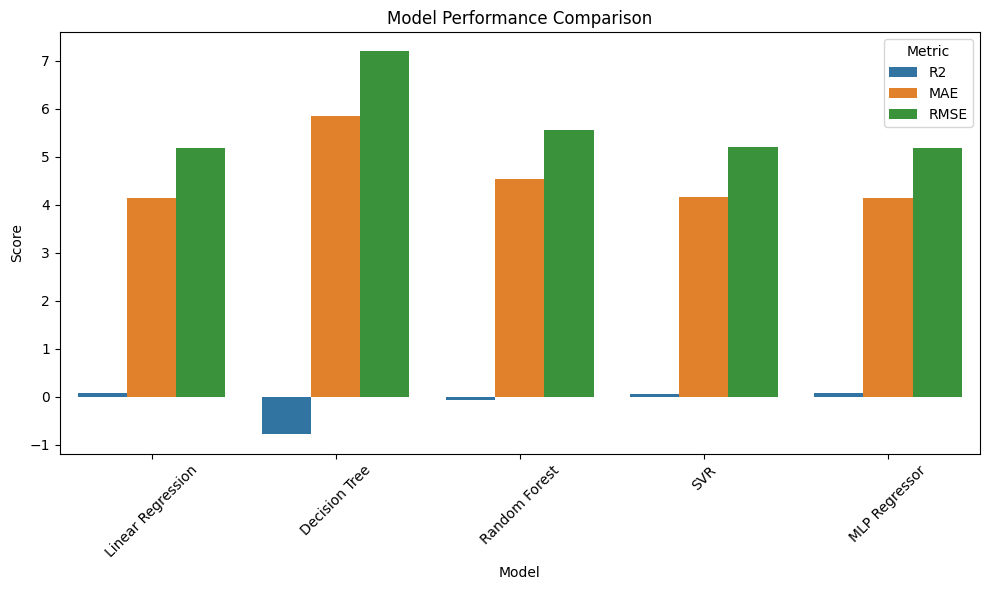

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric')
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
